Processed Data (first 20 rows):
    phenotype  3000502  3000499  3000656  3000676  3003378  3000237  3003308  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
5           0        0        0        0        0        0        0        0   
6           0        0        0        0        0        0        0        0   
7           0        0        0        0        0        0        0        0   
8           0        0        0        0        0        0        0        0   
9           1        0        0        0        0        0        0        0   
10          1        0        0        0        0        0        0        0   
11      

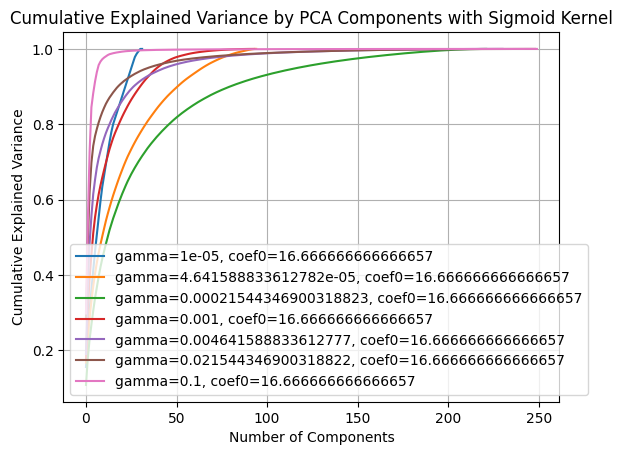

Best parameters: {'gamma': 0.00021544346900318823, 'coef0': 16.666666666666657}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)

# 必要なカラムを削除
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
data_numeric = data.drop(columns=columns_to_drop)

# phenotypeを数値に変換（カテゴリデータを数値に変換）
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes

# クラス`-1`を除外
data_numeric = data_numeric[data_numeric['phenotype'] != -1]

# 数値データのみを保持
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')

# 欠損値のある行を削除
data_numeric = data_numeric.dropna()

# データが空でないか確認
if data_numeric.empty:
    raise ValueError("The dataframe is empty after processing. Please check the data and the processing steps.")

# 前処理後のデータの最初の20行を表示
print("Processed Data (first 20 rows):")
print(data_numeric.head(20))

# 小さいデータセットを抽出
data_sampled = data_numeric.sample(frac=0.1, random_state=42)  # データセットの10%を使用

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

# パラメータ範囲をさらに広げて設定
gamma_values = np.logspace(-5, 1, 10)  # 0.00001から10までの対数スケール
coef0_values = np.linspace(-50, 50, 10)

best_params = None
best_cumulative_sum = None

# 各パラメータの組み合わせを試す
for gamma in gamma_values:
    for coef0 in coef0_values:
        try:
            kpca = KernelPCA(kernel='sigmoid', gamma=gamma, coef0=coef0, fit_inverse_transform=True)
            data_kpca = kpca.fit_transform(data_scaled)

            # カーネルPCA後に通常のPCAを適用
            pca = PCA()
            pca.fit(data_kpca)

            # 説明分散比の累積和を計算
            cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

            # 結果のプロット
            plt.plot(cumulative_sum, label=f'gamma={gamma}, coef0={coef0}')

            # 最適なパラメータを見つける
            if best_cumulative_sum is None or cumulative_sum[-1] > best_cumulative_sum[-1]:
                best_params = {'gamma': gamma, 'coef0': coef0}
                best_cumulative_sum = cumulative_sum
        except ValueError as e:
            print(f"Skipping gamma={gamma}, coef0={coef0} due to error: {e}")

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components with Sigmoid Kernel')
plt.legend()
plt.grid()
plt.show()

print(f"Best parameters: {best_params}")


Skipping gamma=0.1, coef0=16.66666666666667 due to error: There are significant negative eigenvalues (0.997099 of the maximum positive). Either the matrix is not PSD, or there was an issue while computing the eigendecomposition of the matrix.


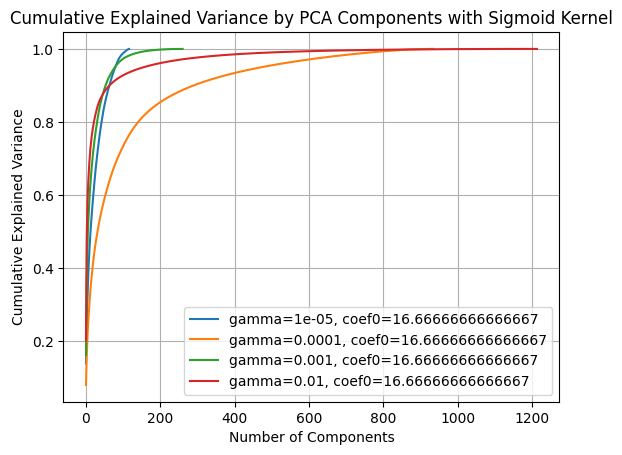

Best parameters: {'gamma': 0.01, 'coef0': 16.66666666666667}


Skipping gamma=0.03593813663804626, coef0=16.66666666666667 due to error: There are significant negative eigenvalues (0.94372 of the maximum positive). Either the matrix is not PSD, or there was an issue while computing the eigendecomposition of the matrix.
Skipping gamma=0.1, coef0=16.66666666666667 due to error: There are significant negative eigenvalues (0.997768 of the maximum positive). Either the matrix is not PSD, or there was an issue while computing the eigendecomposition of the matrix.


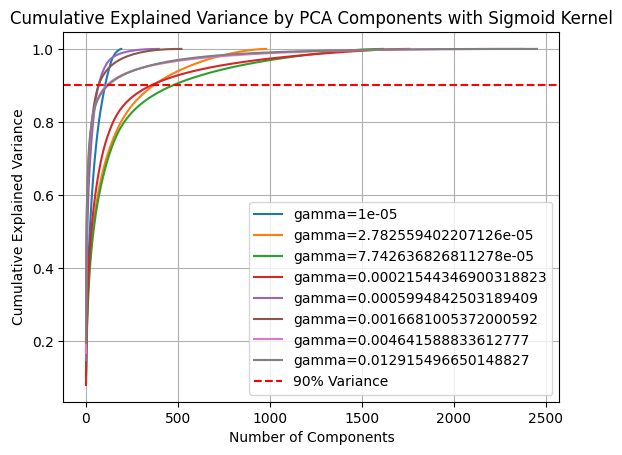

Best parameters: {'gamma': 0.0016681005372000592, 'coef0': 16.66666666666667} with 69 components to reach 90% variance


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)

# 必要なカラムを削除
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
data_numeric = data.drop(columns=columns_to_drop)

# phenotypeを数値に変換（カテゴリデータを数値に変換）
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes

# クラス`-1`を除外
data_numeric = data_numeric[data_numeric['phenotype'] != -1]

# 数値データのみを保持
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')

# 欠損値のある行を削除
data_numeric = data_numeric.dropna()

# データが空でないか確認
if data_numeric.empty:
    raise ValueError("The dataframe is empty after processing. Please check the data and the processing steps.")

data_sampled = data_numeric.sample(frac=1.0, random_state=42)

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

# パラメータ範囲を設定
gamma_values = np.logspace(-5, -1, 10)  # 0.00001から0.1までの対数スケール
fixed_coef0 = 16.66666666666667

best_params = None
min_components_90 = float('inf')

# 各パラメータの組み合わせを試す
for gamma in gamma_values:
    try:
        kpca = KernelPCA(kernel='sigmoid', gamma=gamma, coef0=fixed_coef0, fit_inverse_transform=True)
        data_kpca = kpca.fit_transform(data_scaled)

        # カーネルPCA後に通常のPCAを適用
        pca = PCA()
        pca.fit(data_kpca)

        # 説明分散比の累積和を計算
        cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

        # 90%の累積分散比を超える成分数を特定
        components_90 = np.argmax(cumulative_sum >= 0.9) + 1

        # プロット
        plt.plot(cumulative_sum, label=f'gamma={gamma}')

        # 最適なパラメータを見つける
        if components_90 < min_components_90:
            min_components_90 = components_90
            best_params = {'gamma': gamma, 'coef0': fixed_coef0}
    except ValueError as e:
        print(f"Skipping gamma={gamma}, coef0={fixed_coef0} due to error: {e}")

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components with Sigmoid Kernel')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.legend()
plt.grid()
plt.show()

print(f"Best parameters: {best_params} with {min_components_90} components to reach 90% variance")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)

# 必要なカラムを削除
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
data_numeric = data.drop(columns=columns_to_drop)

# phenotypeを数値に変換（カテゴリデータを数値に変換）
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes

# クラス`-1`を除外
data_numeric = data_numeric[data_numeric['phenotype'] != -1]

# 数値データのみを保持
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')

# 欠損値のある行を削除
data_numeric = data_numeric.dropna()

# データが空でないか確認
if data_numeric.empty:
    raise ValueError("The dataframe is empty after processing. Please check the data and the processing steps.")

data_sampled = data_numeric.sample(frac=1.0, random_state=42)

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

# 最適パラメータを使ってKernelPCAを適用
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# カーネルPCA後に通常のPCAを適用
pca = PCA()
data_pca = pca.fit_transform(data_kpca)

# 累積分散比を計算
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

# 69コンポーネントでの累積分散比を表示
if len(cumulative_sum) >= 69:
    cumulative_variance_69 = cumulative_sum[68]  # 0-based index
    print(f"Cumulative Explained Variance Ratio with 69 components: {cumulative_variance_69:.4f}")
else:
    print("The cumulative explained variance ratio for 69 components could not be determined.")


Cumulative Explained Variance Ratio with 69 components: 0.9001


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

# データの読み込み
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)

# 必要なカラムを削除
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
metadata_columns = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']

# 数値データのみを保持
data_numeric = data.drop(columns=columns_to_drop)
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# メタデータを保持
metadata = data[metadata_columns]
metadata = metadata.loc[data_numeric.index]

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma = 0.0016681005372000592
coef0 = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma, coef0=coef0, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# カーネルPCAの結果をデータフレームに変換
columns = [f'principal_component_{i+1}' for i in range(n_components)]
df_kpca = pd.DataFrame(data_kpca, columns=columns, index=data_numeric.index)

# メタデータとカーネルPCAの結果を統合
df_final = pd.concat([metadata.reset_index(drop=True), df_kpca.reset_index(drop=True)], axis=1)

# 結果をCSVファイルに保存
df_final.to_csv('final_kernel_pca_results_with_metadata.csv', index=False)

print("Kernel PCA results with metadata saved to 'final_kernel_pca_results_with_metadata.csv'.")


Kernel PCA results with metadata saved to 'final_kernel_pca_results_with_metadata.csv'.


In [ ]:
df_final.head(20)

,accession,genus,species,antibiotic,measurement_value,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,...,principal_component_60,principal_component_61,principal_component_62,principal_component_63,principal_component_64,principal_component_65,principal_component_66,principal_component_67,principal_component_68,principal_component_69
0,GCA_002947415,Acinetobacter,baumannii,meropenem,8.0,-5.711666e-09,1.131252e-08,-6.937464e-09,-3.546942e-09,1.859282e-08,...,-4.230397e-10,1.238024e-09,9.578779e-10,-1.750160e-09,-8.682463e-11,7.187769e-10,4.854647e-10,-2.445356e-09,-6.157332e-10,2.178428e-10
1,GCA_002947845,Acinetobacter,baumannii,meropenem,8.0,-5.711666e-09,1.131252e-08,-6.937464e-09,-3.546942e-09,1.859282e-08,...,-4.230397e-10,1.238024e-09,9.578779e-10,-1.750160e-09,-8.682463e-11,7.187769e-10,4.854647e-10,-2.445356e-09,-6.157332e-10,2.178428e-10
2,GCA_002948925,Acinetobacter,baumannii,meropenem,8.0,-4.464654e-09,1.076647e-08,-1.834453e-08,1.079026e-09,1.490956e-08,...,-3.504174e-11,7.575888e-11,5.003565e-10,1.850080e-10,8.261752e-10,-2.343304e-10,-2.014387e-10,7.066358e-10,-2.303720e-10,3.065000e-11
3,GCA_002996805,Acinetobacter,baumannii,meropenem,8.0,-4.968860e-09,9.959050e-09,-8.024461e-09,-2.443406e-10,1.434277e-08,...,-3.075655e-09,3.628519e-10,-2.193142e-09,2.650205e-09,1.044288e-09,-1.586863e-09,-1.681362e-09,-1.922291e-09,3.946708e-10,6.860170e-10
4,GCA_003006035,Acinetobacter,baumannii,meropenem,8.0,-5.470828e-09,8.523871e-09,-9.358426e-09,-5.013246e-10,1.747520e-08,...,-1.526830e-09,2.626456e-09,-3.666537e-10,-1.970434e-09,5.425330e-10,3.301348e-09,1.676751e-09,1.464980e-09,1.529371e-09,4.620166e-11
5,GCA_003010675,Acinetobacter,baumannii,meropenem,8.0,-5.711666e-09,1.131252e-08,-6.937464e-09,-3.546942e-09,1.859282e-08,...,-4.230397e-10,1.238024e-09,9.578779e-10,-1.750160e-09,-8.682463e-11,7.187769e-10,4.854647e-10,-2.445356e-09,-6.157332e-10,2.178428e-10
6,GCA_003029495,Acinetobacter,baumannii,meropenem,8.0,-5.711666e-09,1.131252e-08,-6.937464e-09,-3.546942e-09,1.859282e-08,...,-4.230397e-10,1.238024e-09,9.578779e-10,-1.750160e-09,-8.682463e-11,7.187769e-10,4.854647e-10,-2.445356e-09,-6.157332e-10,2.178428e-10
7,GCA_003431865,Acinetobacter,baumannii,meropenem,8.0,-5.711666e-09,1.131252e-08,-6.937464e-09,-3.546942e-09,1.859282e-08,...,-4.230397e-10,1.238024e-09,9.578779e-10,-1.750160e-09,-8.682463e-11,7.187769e-10,4.854647e-10,-2.445356e-09,-6.157332e-10,2.178428e-10
8,GCA_003547115,Acinetobacter,baumannii,meropenem,8.0,-5.711666e-09,1.131252e-08,-6.937464e-09,-3.546942e-09,1.859282e-08,...,-4.230397e-10,1.238024e-09,9.578779e-10,-1.750160e-09,-8.682463e-11,7.187769e-10,4.854647e-10,-2.445356e-09,-6.157332e-10,2.178428e-10
9,GCF_000972525,Acinetobacter,baumannii,meropenem,1.0,-6.127822e-09,1.212951e-08,-5.981347e-09,-3.450529e-09,1.739298e-08,...,6.160032e-10,-1.282733e-09,-8.128879e-10,1.729074e-09,-3.323189e-10,-1.027680e-09,-2.723111e-10,1.868809e-09,3.876571e-10,-6.017353e-10


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
data_numeric = data.drop(columns=columns_to_drop)
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# 最適なパラメータを設定
gamma = 0.0016681005372000592
fixed_coef0 = 16.66666666666667
n_components = 69

# カーネルPCAの実行
kpca = KernelPCA(kernel='sigmoid', gamma=gamma, coef0=fixed_coef0, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X_train, X_test, y_train, y_test = train_test_split(data_kpca, data_numeric['phenotype'], test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVMのハイパーパラメータグリッド
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# GridSearchCVの設定
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_train_smote, y_train_smote)

# 最適なモデルの選択
best_model = grid.best_estimator_

# テストデータでの予測
y_pred = best_model.predict(X_test)

# classification_reportの生成
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report with Best SVM Model:\n", report)
print("Best parameters found by GridSearchCV:\n", grid.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.870 total time=   1.5s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.839 total time=   2.1s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.879 total time=   2.5s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.866 total time=   1.7s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.837 total time=   1.7s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.974 total time=   0.7s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.963 total time=   0.6s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.977 total time=   0.7s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.959 total time=   0.7s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.974 total time=   0.7s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.974 total time=   0.6s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
data_numeric = data.drop(columns=columns_to_drop)
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X_train, X_test, y_train, y_test = train_test_split(data_kpca, data_numeric['phenotype'], test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器の訓練と評価
svm_params = {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
clf = SVC(**svm_params, random_state=42)
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)

# classification_reportの生成
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report with Best SVM Model:\n", report)


Classification Report with Best SVM Model:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       417
           1       1.00      1.00      1.00      1369

    accuracy                           1.00      1786
   macro avg       0.99      0.99      0.99      1786
weighted avg       1.00      1.00      1.00      1786



In [ ]:
from sklearn.model_selection import cross_val_score

# カーネルPCAを実行
kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X_train, X_test, y_train, y_test = train_test_split(data_kpca, data_numeric['phenotype'], test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器
svm_params = {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
clf = SVC(**svm_params, random_state=42)

# クロスバリデーションスコアの計算
scores = cross_val_score(clf, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')
print("Cross-validation F1 scores:", scores)
print("Average cross-validation F1 score:", np.mean(scores))


Cross-validation F1 scores: [0.99921997 0.99921997 1.         0.99765989 0.99765989]
Average cross-validation F1 score: 0.9987519447623547


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
data_numeric = data.drop(columns=columns_to_drop)
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割（ホールドアウトセット）
X_train, X_holdout, y_train, y_holdout = train_test_split(data_kpca, data_numeric['phenotype'], test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器の訓練と評価
svm_params = {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
clf = SVC(**svm_params, random_state=42)
clf.fit(X_train_smote, y_train_smote)
y_pred_holdout = clf.predict(X_holdout)

# classification_reportの生成
report_holdout = classification_report(y_holdout, y_pred_holdout, zero_division=1)
print("Classification Report on Holdout Set:\n", report_holdout)


Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       417
           1       1.00      1.00      1.00      1369

    accuracy                           1.00      1786
   macro avg       0.99      0.99      0.99      1786
weighted avg       1.00      1.00      1.00      1786



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
data_numeric = data.drop(columns=columns_to_drop)
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# データ分割（ホールドアウトセット）
X = data_numeric.drop(columns=['phenotype'])
y = data_numeric['phenotype']
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=42)

# 訓練データの標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
X_train_kpca = kpca.fit_transform(X_train_scaled)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_kpca, y_train)

# テストデータの前処理
X_holdout_scaled = scaler.transform(X_holdout)
X_holdout_kpca = kpca.transform(X_holdout_scaled)

# SVM分類器の訓練と評価
svm_params = {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
clf = SVC(**svm_params, random_state=42)
clf.fit(X_train_smote, y_train_smote)
y_pred_holdout = clf.predict(X_holdout_kpca)

# classification_reportの生成
report_holdout = classification_report(y_holdout, y_pred_holdout, zero_division=1)
print("Classification Report on Holdout Set:\n", report_holdout)


Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.64      0.73      0.68       417
           1       0.91      0.88      0.89      1369

    accuracy                           0.84      1786
   macro avg       0.78      0.80      0.79      1786
weighted avg       0.85      0.84      0.85      1786



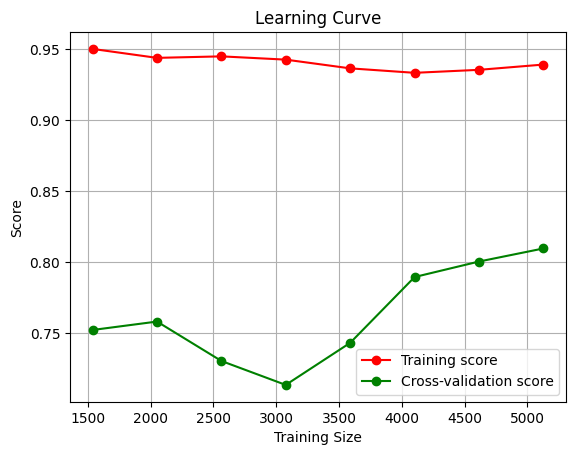

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 学習曲線のプロット
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train_smote, y_train_smote, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


Train Accuracy: 0.9951980792316927
Test Accuracy: 0.9874037788663401
Holdout Accuracy: 0.9874055415617129
Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       276
           1       0.99      1.00      0.99       915

    accuracy                           0.99      1191
   macro avg       0.99      0.98      0.98      1191
weighted avg       0.99      0.99      0.99      1191



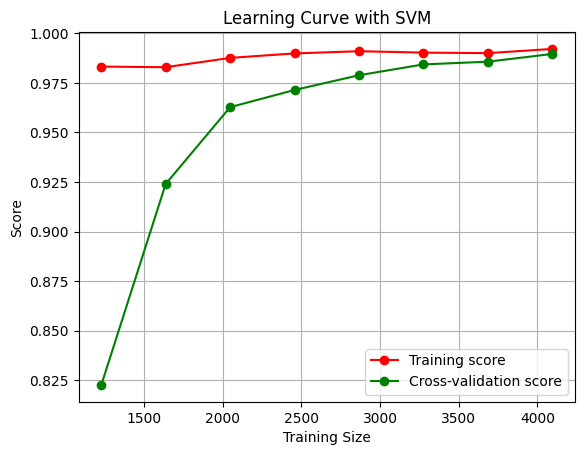

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
metadata_columns = ['accession', 'genus', 'species', 'antibiotic']
data_numeric = data.drop(columns=columns_to_drop)
metadata = data[metadata_columns]
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X = data_kpca
y = data_numeric['phenotype']

# ホールドアウトセットの分割
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練セットの分割
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器の訓練
svm_params = {'C': 0.31622776601683794, 'gamma': 'scale', 'kernel': 'poly'}
clf = SVC(**svm_params, random_state=42)
clf.fit(X_train_smote, y_train_smote)

# 訓練セットとテストセットの評価
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# ホールドアウトセットでの評価
y_holdout_pred = clf.predict(X_holdout)
print("Holdout Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# classification_reportの生成
report_holdout = classification_report(y_holdout, y_holdout_pred, zero_division=1)
print("Classification Report on Holdout Set:\n", report_holdout)

# メタデータを含む結果の保存
results = pd.DataFrame(X_holdout, columns=[f'component_{i}' for i in range(1, n_components + 1)])
results['predicted_phenotype'] = y_holdout_pred
results = pd.concat([results, metadata.iloc[y_holdout.index].reset_index(drop=True)], axis=1)
results.to_csv('predicted_results_with_metadata.csv', index=False)

# 学習曲線のプロット
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve with SVM')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('learning_curve.png')
plt.show()


Train Accuracy: 0.9897959183673469
Test Accuracy: 0.9811056682995102
Holdout Accuracy: 0.9773299748110831
Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       276
           1       0.97      1.00      0.99       915

    accuracy                           0.98      1191
   macro avg       0.98      0.95      0.97      1191
weighted avg       0.98      0.98      0.98      1191



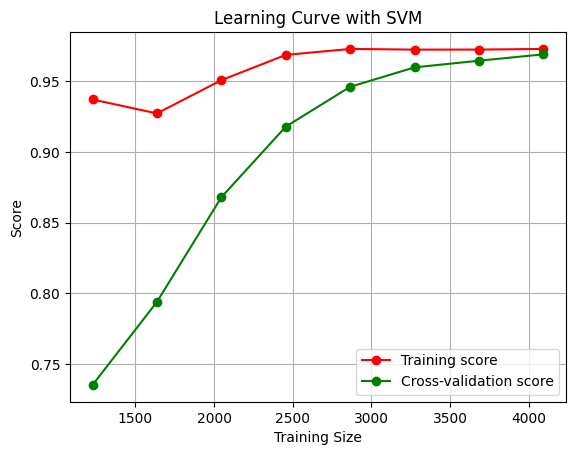

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
metadata_columns = ['accession', 'genus', 'species', 'antibiotic']
data_numeric = data.drop(columns=columns_to_drop)
metadata = data[metadata_columns]
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X = data_kpca
y = data_numeric['phenotype']

# ホールドアウトセットの分割
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練セットの分割
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器の訓練
svm_params = {'C': 0.11622776601683794, 'gamma': 'scale', 'kernel': 'poly'}
clf = SVC(**svm_params, random_state=42)
clf.fit(X_train_smote, y_train_smote)

# 訓練セットとテストセットの評価
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# ホールドアウトセットでの評価
y_holdout_pred = clf.predict(X_holdout)
print("Holdout Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# classification_reportの生成
report_holdout = classification_report(y_holdout, y_holdout_pred, zero_division=1)
print("Classification Report on Holdout Set:\n", report_holdout)

# メタデータを含む結果の保存
results = pd.DataFrame(X_holdout, columns=[f'component_{i}' for i in range(1, n_components + 1)])
results['predicted_phenotype'] = y_holdout_pred
results = pd.concat([results, metadata.iloc[y_holdout.index].reset_index(drop=True)], axis=1)
results.to_csv('predicted_results_with_metadata.csv', index=False)

# 学習曲線のプロット
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve with SVM')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('learning_curve.png')
plt.show()


Train Accuracy: 0.9930972388955582
Test Accuracy: 0.9853044086773968
Holdout Accuracy: 0.9848866498740554
Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       276
           1       0.98      1.00      0.99       915

    accuracy                           0.98      1191
   macro avg       0.99      0.97      0.98      1191
weighted avg       0.98      0.98      0.98      1191



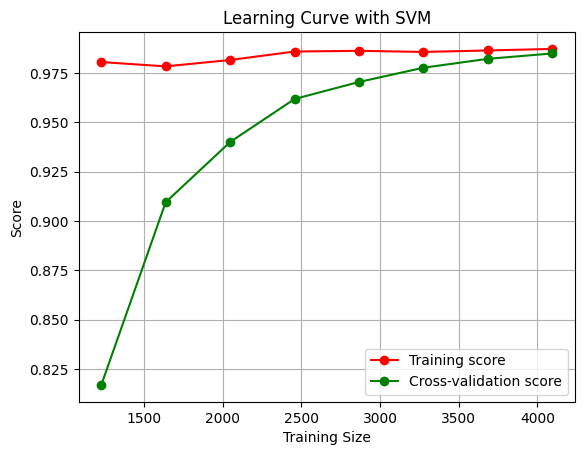

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
metadata_columns = ['accession', 'genus', 'species', 'antibiotic']
data_numeric = data.drop(columns=columns_to_drop)
metadata = data[metadata_columns]
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X = data_kpca
y = data_numeric['phenotype']

# ホールドアウトセットの分割
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練セットの分割
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器の訓練
svm_params = {'C': 0.21622776601683794, 'gamma': 'scale', 'kernel': 'poly'}
clf = SVC(**svm_params, random_state=42)
clf.fit(X_train_smote, y_train_smote)

# 訓練セットとテストセットの評価
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# ホールドアウトセットでの評価
y_holdout_pred = clf.predict(X_holdout)
print("Holdout Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# classification_reportの生成
report_holdout = classification_report(y_holdout, y_holdout_pred, zero_division=1)
print("Classification Report on Holdout Set:\n", report_holdout)

# メタデータを含む結果の保存
results = pd.DataFrame(X_holdout, columns=[f'component_{i}' for i in range(1, n_components + 1)])
results['predicted_phenotype'] = y_holdout_pred
results = pd.concat([results, metadata.iloc[y_holdout.index].reset_index(drop=True)], axis=1)
results.to_csv('predicted_results_with_metadata.csv', index=False)

# 学習曲線のプロット
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve with SVM')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('learning_curve.png')
plt.show()


Train Accuracy: 0.9873949579831933
Test Accuracy: 0.9811056682995102
Holdout Accuracy: 0.9764903442485307
Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       276
           1       0.97      1.00      0.98       915

    accuracy                           0.98      1191
   macro avg       0.98      0.95      0.97      1191
weighted avg       0.98      0.98      0.98      1191



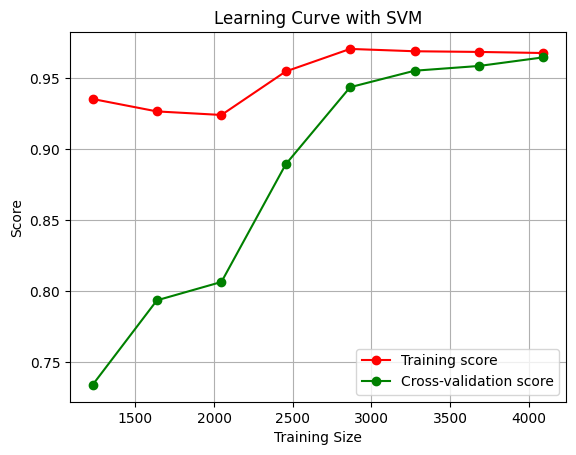

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
metadata_columns = ['accession', 'genus', 'species', 'antibiotic']
data_numeric = data.drop(columns=columns_to_drop)
metadata = data[metadata_columns]
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X = data_kpca
y = data_numeric['phenotype']

# ホールドアウトセットの分割
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練セットの分割
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器の訓練
svm_params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
clf = SVC(**svm_params, random_state=42)
clf.fit(X_train_smote, y_train_smote)

# 訓練セットとテストセットの評価
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# ホールドアウトセットでの評価
y_holdout_pred = clf.predict(X_holdout)
print("Holdout Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# classification_reportの生成
report_holdout = classification_report(y_holdout, y_holdout_pred, zero_division=1)
print("Classification Report on Holdout Set:\n", report_holdout)

# メタデータを含む結果の保存
results = pd.DataFrame(X_holdout, columns=[f'component_{i}' for i in range(1, n_components + 1)])
results['predicted_phenotype'] = y_holdout_pred
results = pd.concat([results, metadata.iloc[y_holdout.index].reset_index(drop=True)], axis=1)
results.to_csv('predicted_results_with_metadata.csv', index=False)

# 学習曲線のプロット
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve with SVM')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('learning_curve.png')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
data_numeric = data.drop(columns=columns_to_drop)
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# PCAの実行（全ての主成分）
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# 累積分散比の計算（全ての主成分）
cumulative_explained_variance_ratio_full = np.cumsum(pca.explained_variance_ratio_)

# カーネルPCAの実行（指定されたパラメータ）
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components)
data_kpca = kpca.fit_transform(data_scaled)

# 69個のカーネルPCA主成分による累積分散比を全体のPCAと比較
total_variance_ratio_at_69 = cumulative_explained_variance_ratio_full[n_components - 1]  # 0-based index

# 69個の主成分による累積分散比率を全体に対して表示
print(f"Cumulative Explained Variance Ratio with {n_components} components (Full PCA): {total_variance_ratio_at_69:.4f}")


Cumulative Explained Variance Ratio with 69 components (Full PCA): 0.8684


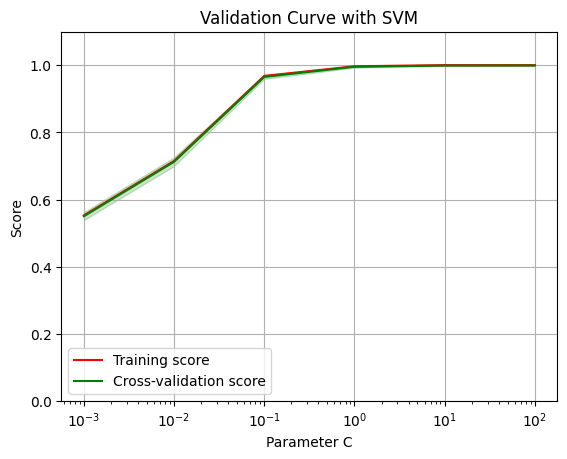

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve, validation_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
metadata_columns = ['accession', 'genus', 'species', 'antibiotic']
data_numeric = data.drop(columns=columns_to_drop)
metadata = data[metadata_columns]
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X = data_kpca
y = data_numeric['phenotype']

# ホールドアウトセットの分割
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練セットの分割
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器のパラメータ範囲の設定
param_range = np.logspace(-3, 2, 6)

# Validation curveの計算
train_scores, test_scores = validation_curve(
    SVC(kernel='poly', gamma='scale', random_state=42),
    X_train_smote,
    y_train_smote,
    param_name='C',
    param_range=param_range,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# 平均スコアと標準偏差の計算
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Validation curveのプロット
plt.figure()
plt.title('Validation Curve with SVM')
plt.xlabel('Parameter C')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label='Training score', color='r')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.semilogx(param_range, test_scores_mean, label='Cross-validation score', color='g')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.legend(loc='best')
plt.grid()
plt.savefig('validation_curve.png')
plt.show()


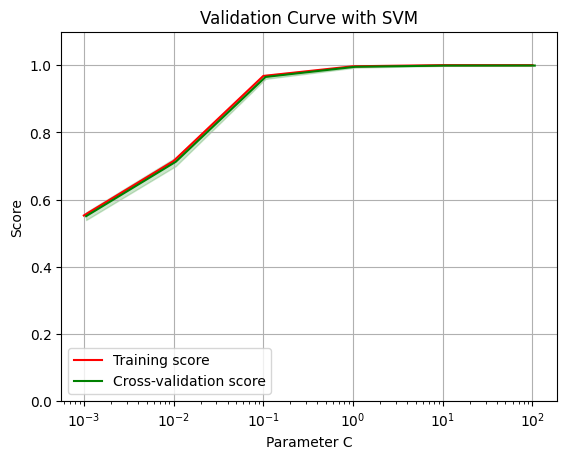

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
metadata_columns = ['accession', 'genus', 'species', 'antibiotic']
data_numeric = data.drop(columns=columns_to_drop)
metadata = data[metadata_columns]
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X = data_kpca
y = data_numeric['phenotype']

# ホールドアウトセットの分割
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練セットの分割
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器のパラメータ範囲の設定
param_range = np.logspace(-3, 2, 6)

# Validation curveの計算
train_scores, test_scores = validation_curve(
    SVC(kernel='poly', gamma='scale', random_state=42),
    X_train_smote,
    y_train_smote,
    param_name='C',
    param_range=param_range,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# 平均スコアと標準偏差の計算
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# データポイントを少しずらしてプロット
offset = 0.06  # 視覚的なオフセット
plt.figure()
plt.title('Validation Curve with SVM')
plt.xlabel('Parameter C')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label='Training score', color='r')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.semilogx(param_range * (1 + offset), test_scores_mean, label='Cross-validation score', color='g')  # データポイントを少しずらす
plt.fill_between(param_range * (1 + offset), test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.legend(loc='best')
plt.grid()
plt.savefig('validation_curve_offset.png')
plt.show()


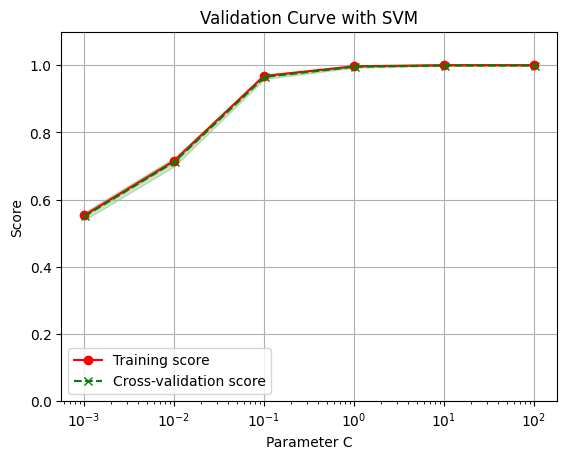

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
metadata_columns = ['accession', 'genus', 'species', 'antibiotic']
data_numeric = data.drop(columns=columns_to_drop)
metadata = data[metadata_columns]
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X = data_kpca
y = data_numeric['phenotype']

# ホールドアウトセットの分割
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練セットの分割
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器のパラメータ範囲の設定
param_range = np.logspace(-3, 2, 6)

# Validation curveの計算
train_scores, test_scores = validation_curve(
    SVC(kernel='poly', gamma='scale', random_state=42),
    X_train_smote,
    y_train_smote,
    param_name='C',
    param_range=param_range,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# 平均スコアと標準偏差の計算
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# データポイントを少しずらしてプロット
offset = 0.02  # 視覚的なオフセット
plt.figure()
plt.title('Validation Curve with SVM')
plt.xlabel('Parameter C')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label='Training score', color='r', linestyle='-', marker='o')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.semilogx(param_range * (1 + offset), test_scores_mean, label='Cross-validation score', color='g', linestyle='--', marker='x')  # データポイントを少しずらす
plt.fill_between(param_range * (1 + offset), test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.legend(loc='best')
plt.grid()
plt.savefig('validation_curve_offset.png')
plt.show()


Train Accuracy: 0.9873949579831933
Test Accuracy: 0.9811056682995102
Holdout Accuracy: 0.9764903442485307
Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       276
           1       0.97      1.00      0.98       915

    accuracy                           0.98      1191
   macro avg       0.98      0.95      0.97      1191
weighted avg       0.98      0.98      0.98      1191



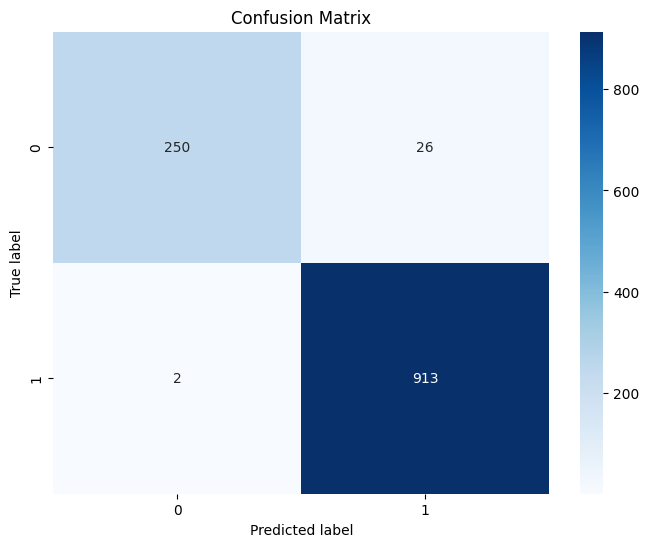

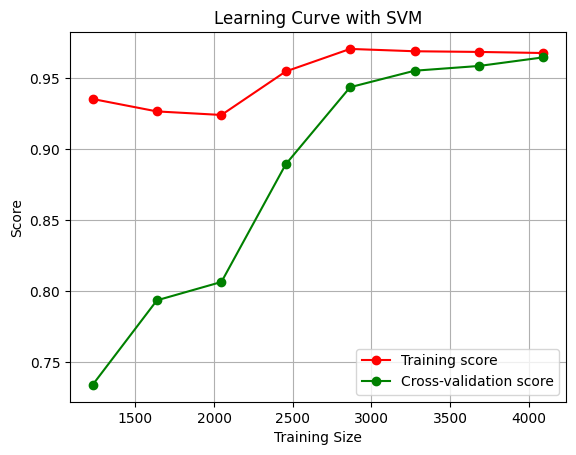

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込みと前処理
data = pd.read_csv('ResistanceJoinedStrictBiofiltered.tsv', sep='\t', low_memory=False)
columns_to_drop = ['accession', 'genus', 'species', 'antibiotic', 'measurement_value']
metadata_columns = ['accession', 'genus', 'species', 'antibiotic']
data_numeric = data.drop(columns=columns_to_drop)
metadata = data[metadata_columns]
data_numeric['phenotype'] = data['phenotype'].astype('category').cat.codes
data_numeric = data_numeric[data_numeric['phenotype'] != -1]
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna()

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# カーネルPCAの実行
gamma_kpca = 0.0016681005372000592
coef0_kpca = 16.66666666666667
n_components = 69

kpca = KernelPCA(kernel='sigmoid', gamma=gamma_kpca, coef0=coef0_kpca, n_components=n_components, fit_inverse_transform=True)
data_kpca = kpca.fit_transform(data_scaled)

# データ分割
X = data_kpca
y = data_numeric['phenotype']

# ホールドアウトセットの分割
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練セットの分割
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# SMOTEによるオーバーサンプリング
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM分類器の訓練
svm_params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
clf = SVC(**svm_params, random_state=42)
clf.fit(X_train_smote, y_train_smote)

# 訓練セットとテストセットの評価
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# ホールドアウトセットでの評価
y_holdout_pred = clf.predict(X_holdout)
print("Holdout Accuracy:", accuracy_score(y_holdout, y_holdout_pred))

# classification_reportの生成
report_holdout = classification_report(y_holdout, y_holdout_pred, zero_division=1)
print("Classification Report on Holdout Set:\n", report_holdout)

# 混同行列のプロット
cm = confusion_matrix(y_holdout, y_holdout_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# 学習曲線のプロット
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve with SVM')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('learning_curve.png')
plt.show()

